#### CT4101 Machine learning, Semester 1 2024-2025
# Linear regression using numpy and scikit-learn

#### 18 September 2024

Machine learning (ML) algorithms allow a computer program to learn to improve its performance at a specified task with experience. ML algorithms may be applied to tasks such as classification, clustering, regression, transcription, translation, anomaly detection and sequential decision making (e.g. in Markov decision processes or Markov games). The benefits of ML research are beginning to be felt in society; outputs of ML research include useful everyday services that can recognise handwriting, protect users from email spam and financial fraud, and recommend suitable products or services according to a customer's preferences.

Linear regression in one or more variables is one of the most common tasks which must be solved by machine learning practitioners. Given a set of measurements for $j$ independent scalar variables $\{x_{1},x_{2},...,x_{j}\}$ and a corresponding set of observations for a dependent scalar variable $y$, the goal of linear regression is to fit a model which may be used to predict $y$ for any given values of $\{x_{1},x_{2},...,x_{j}\}$. Formally (Eqn. 1): 

\begin{equation}
    y = \theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + ... + \theta_{j} x_j
\end{equation}

where $\{\theta_{1},\theta_{2},...,\theta_{j}\}$ are the weights for each independent variable and $\theta_{0}$ accounts for any constant observed effect on the value of $y$ (similar to the intercept value in the equation for a simple straight line on a 2D plane). For a given training set, weights must be learned or found which minimise the error (defined by a cost function) between the predicted and actual values for the target variable $y$. One commonly used ML technique for solving linear regression problems is to apply gradient descent to minimise a squared error cost function.

This notebook demonstrates how a simple linear regression problem may be solved (by simple linear regression, we mean that there is only one indepenent variable).
Simple linear regression creates a model that is equivalent to the representation of a straight line on a 2D plane, and you may remember the following well-known equation from your school days (Eqn. 2):

\begin{equation}
    y = m x + c
\end{equation}

where $m$ is the slope of the line, and $c$ is the intercept value. The intercept accounts for constant factors that affect the value of $y$. Eqn. 1 above generalises Eqn. 2 to the case where there is more than one independent variable that influences the value of $y$.

Where there is just one independent variable, Eqn. 1 and Eqn. 2 are equivalent: in Eqn. 1 $\theta_{0}$ is the intercept ($c$ in Eqn. 2), while $\theta_{1}$ in Eqn. 1 is equivalent to $m$ in Eqn. 2.

Let's begin by setting up a simple training dataset in a matrix (numpy array), and then extracting the column vectors for the independent variable $x$ and the dependent variable $y$.

In [2]:
import numpy as np
import pandas as pd

# dataset 1. Here we write the data directly into a 2D numpy array
"""data = np.array([
    [80, 28.3],
    [110, 51.5],
    [110, 47.3],
    [130, 67.4]
])

"""
# dataset 2. Here we load a different dataset in from the file external_data.csv using the pandas library
df = pd.read_csv("external_data.csv")
print("Data in pandas dataframe: \n", df)
data = df.to_numpy()

print("Numpy 2D array:\n", data)

# Create and print x - the column vector of measured values for the independent variable
x = data[:,0].reshape((-1, 1)) # the -1 here means the length of the column vector will be inferred
print("x:\n", x)

# Create and print y - the column vector of observed values for the dependent variable
y = np.array([data[:,1]]).reshape(-1,1)
print("y:\n", y)

Data in pandas dataframe: 
     independent variable   dependent variable
0                     30                   70
1                     40                   90
2                     40                  100
3                     50                  120
4                     50                  130
5                     50                  150
6                     60                  160
7                     70                  190
8                     70                  200
9                     80                  200
10                    80                  220
11                    80                  230
Numpy 2D array:
 [[ 30  70]
 [ 40  90]
 [ 40 100]
 [ 50 120]
 [ 50 130]
 [ 50 150]
 [ 60 160]
 [ 70 190]
 [ 70 200]
 [ 80 200]
 [ 80 220]
 [ 80 230]]
x:
 [[30]
 [40]
 [40]
 [50]
 [50]
 [50]
 [60]
 [70]
 [70]
 [80]
 [80]
 [80]]
y:
 [[ 70]
 [ 90]
 [100]
 [120]
 [130]
 [150]
 [160]
 [190]
 [200]
 [200]
 [220]
 [230]]


Now we'll plot the values of $x$ and $y$ using the scatter plot from the matplotlib library (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

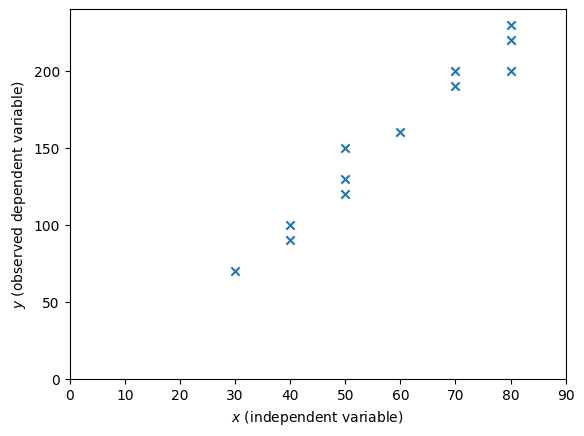

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x, y, marker="x")
plt.xlim([0, max(x)+10])
plt.ylim([0, max(y)+10])
plt.xlabel("$x$ (independent variable)")
plt.ylabel("$y$ (observed dependent variable)")
plt.show()

Now that we have an idea what our data looks like, let's try fitting a simple linear regression model to it. We're going to use the LinearRegression model from scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # create a new LinearRegression object that will hold our model
model.fit(x, y)  # the .fit() method calculates the model parameters
theta_0 = model.intercept_[0]  # the intercept accounts for constant effects, \theta_0 in Eqn. 1 above
theta_1 = model.coef_[0][0] # this is the "slope", \theta_1 in Eqn. 2 above
predictions = model.predict(x)
print("Model intercept:", theta_0)  
print("Model coefficient:", theta_1)  
print("Model predictions:\n", predictions) 

Model intercept: -20.000000000000057
Model coefficient: 3.000000000000001
Model predictions:
 [[ 70.]
 [100.]
 [100.]
 [130.]
 [130.]
 [130.]
 [160.]
 [190.]
 [190.]
 [220.]
 [220.]
 [220.]]


Next let's plot the linear regression model, along with the original values and the values predicted by our model.

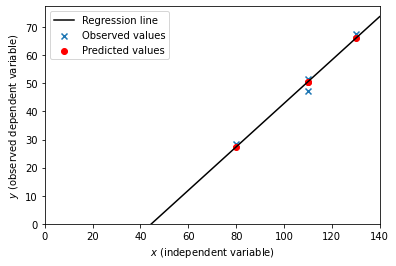

In [37]:
plt.scatter(x, y, marker="x", label="Observed values")
plt.scatter(x, predictions, marker="o", color="red", label="Predicted values")
reg_x_vals = np.linspace(0, max(x)+10, 10)
reg_y_vals = np.array([(theta_1 * x_i) + theta_0 for x_i in reg_x_vals])
plt.plot(reg_x_vals, reg_y_vals, color="black", label="Regression line")
plt.xlim([0, max(x)+10])
plt.ylim([0, max(y)+10])
plt.xlabel("$x$ (independent variable)")
plt.ylabel("$y$ (observed dependent variable)")
plt.legend()
plt.show()

Now let's quantify how accurately our model fits the training dataset. A commonly used metric for regression models is root-mean-square-error (RMSE), which may be calculated as:

\begin{equation}
    \label{eqn:rmse}
     RMSE = \sqrt{\frac{1}{m}\Sigma_{i=1}^{m}{\Big(\hat{y}_i - \vec{y}_i\Big)^2}}
\end{equation}

where $\hat{y}$ is the vector of predictions from our model for each $x$ value in our training dataset, $\vec{y}$ is a vector containing the actual observed values for each x value in our training dataset.

The coefficent of determination $R^2$ is another commonly used metric for regression models.

N.B. for the sake of simplicity, the RMSE and $R^2$ metrics are calculated using training data only. To evaluate the model properly we should also claculate these metrics separately on on independent test data (more on this in later lectures!) 

In [38]:
# this function calculates RMSE as per the equation above
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# calculate and print the RMSE
calculated_rmse1 = rmse(predictions, y)
print("RMSE:", calculated_rmse1)

# calculate and print the coefficient of determination
r_sq = model.score(x, y)
print("Coefficient of determination:", r_sq)

RMSE: 1.8894703065186529
Coefficient of determination: 0.9815885948385498


# Developing a linear regression model using numpy and the singular value decomposition
This section will demonstrate an alternative method to develop a least squares linear regression model using the Singular Value Decomposition (SVD).

Matrix decomposition techniques allow a given matrix to be factorised as a product of matrices. Eigendecomposition is one of the most widely used matrix decomposition methods, which allows a matrix to be decomposed into a set of eigenvectors and eigenvalues. The SVD may be used to factorise a real or complex matrix into singular values and singular vectors. All real matrices have a SVD, which makes it more generally applicable than other matrix factorisation methods (e.g. eigendecompositions are not defined for $m \times n$ matrices, i.e. matrices which are not square). The SVD may be used to factorise a matrix $A$ as follows:

\begin{equation}
\label{eqn:svd}
A = U\Sigma V^{T}
\end{equation}

where: 
* $A$ is a $m \times n$ matrix.
* $U$ is a $m \times m$ orthogonal matrix (i.e. a matrix with rows and columns comprised of orthogonal unit vectors) containing the **left singular vectors**. The left singular vectors are a set of orthonormal (i.e. both orthogonal and normal) eigenvectors of $AA^{T}$.
* $\Sigma$ is a $m \times n$ diagonal matrix, where each of the non-negative diagonal entries $\{\sigma_{1},\sigma_{2},...\}$ is a **singular value**. The singular values are are the square roots of the eigenvalues of $A^{T}A$ and of $AA^{T}$. Note that there are $\mathrm{min}(m,n)$ singular values.
* $V$ is an $n \times n$ orthogonal matrix containing the **right singular vectors**. The right singular vectors are a set of orthonormal eigenvectors of $A^{T}A$.

\begin{equation}
\label{eqn:svd_k}
A_k = U_k \Sigma_k V^{T}_k
\end{equation}

Taking a linear algebra perspective, a linear regression problem may be modelled as follows (Eqn. 3):

\begin{equation}
    X \vec{\theta} = \vec{y}
\end{equation}

where $X$ is a matrix containing the measured values for the independent variables $\{x_{1},x_{2},...,x_{j}\}$, $\vec{\theta}$ is a column vector containing the set of model weights $\{\theta_{0},\theta_{1},\theta_{2},...,\theta_{j}\}$ and $\vec{y}$ is a column vector containing the observations of the dependent variable.

Note that when constructing $X$, to account for constant observed effects on the value of the target variable $y$, an all-ones column vector should be appended to the left of the columns containing the observations of the dependent variables, so that the format of $X$ is as follows (Eqn. 4):

\begin{equation}
X=
  \begin{bmatrix}
    1 & x_{1,1} & x_{1,2} & ... & x_{1,j} \\
    1 & x_{2,1} & x_{2,2} & ... & x_{2,j} \\
    ... & ...   & ...     & ... & ... \\
    1 & x_{m,1} & x_{m,2} & ... & x_{m,j} 
  \end{bmatrix}
\end{equation}

where $m$ is the number of data points in the training set, and the notation $x_{m,j}$ refers to the observation in the $m$th data point of the $j$th independent variable.

If $X$ is invertible, the set of model weights could easily computed by premultiplying each side of Eqn. 3 by $X^{-1}$ to obtain the following result (Eqn. 5):

\begin{align}
    \label{eqn:linregmatrixnaive}
    X^{-1} X \vec{\theta} = X^{-1} \vec{y} \nonumber\\
    \vec{\theta} = X^{-1} \vec{y}
\end{align}

However, a matrix is only invertible if it is square (i.e. $m=n$) and if all of its columns are linearly independent. Therefore, while Eqn. 5 could be used to calculate $\vec{\theta}$ exactly for a given $X$ and $\vec{y}$, assuming that $X$ is invertible greatly restricts its applicability, requiring all observed values of the target variable to fit the model exactly. If $X$ has more rows than columns (i.e. $m$ > $n$) it is possible for Eqn. 5 to have no solution, whereas if $X$ has more columns than rows (i.e. $m$ < $n$) it is possible for Eqn. 5 to have multiple different solutions.

A more general result to compute an approximation of $\vec{\theta}$ which minimises the Euclidian norm $|| X \vec{\theta} - {\vec{y}} ||_2$ may be developed using the Moore-Penrose psuedoinverse. The psuedoinverse $A^{+}$ of a given matrix $A$ may be calculated as (Eqn. 6):

\begin{equation}
    \label{eqn:psuedoinverse}
    A^{+} = V \Sigma^{+} U^{T}
\end{equation}

where $U$, $\Sigma$ and $V$ are the SVD of A. $\Sigma^{+}$ is obtained by first taking the reciprocal of the nonzero entries of the diagonal matrix $\Sigma$ containing the singular values and then taking the transpose of the resulting matrix.

To compute the approximation of the weights $\vec{\theta}$, $X^{+}$ may be used as a substitute for $X^{-1}$ in Eqn. 5 to obtain the following result (Eqn. 7):

\begin{align}
    \label{eqn:linregmatrixpsuedo}
    \vec{\theta} = X^{+} \vec{y}
\end{align}

In [39]:
# the dimensions of the matrix X
m = len(data)
n = len(data[0])  # add an additional column for the all-ones vector

# Create and print X - the matrix of observed values for the independent variables
X = np.c_[np.ones(m), data[:,0]]
print("X:\n", X)

X:
 [[  1.  80.]
 [  1. 110.]
 [  1. 110.]
 [  1. 130.]]


In [40]:
# calculate and print the Moore-Penrose psuedoinverse of X
X_pi = np.linalg.pinv(X)
print("Psuedoinverse of X:\n", X_pi)

Psuedoinverse of X:
 [[ 2.56862745e+00  3.92156863e-02  3.92156863e-02 -1.64705882e+00]
 [-2.15686275e-02  1.96078431e-03  1.96078431e-03  1.76470588e-02]]


In [41]:
# calculate and print the values in the model weights vector theta using Eqn. 7
theta = np.dot(X_pi, y)
print("Vector of caclulated model weights:\n",theta)

Vector of caclulated model weights:
 [[-34.44509804]
 [  0.7727451 ]]


In [42]:
# calculate and print the predicted y values when using the values from X
y_hat = np.dot(X, theta)
print(y_hat)

[[27.3745098 ]
 [50.55686275]
 [50.55686275]
 [66.01176471]]


Finally, let's quantify how accurately our model fits the training dataset as before.

In [43]:
# calculate and print the RMSE
calculated_rmse2 = rmse(y_hat, y)
print(calculated_rmse2)

1.889470306518652
